In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('train.csv')
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
17451,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28475,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3083,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3037,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import matplotlib.pyplot as plt

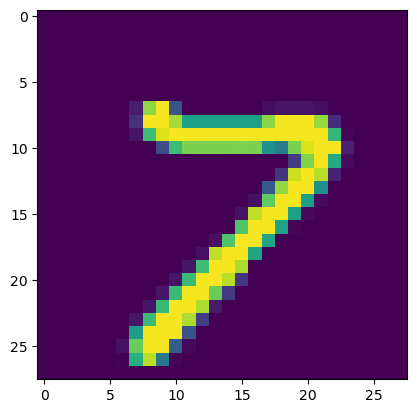

In [14]:
plt.imshow(df.iloc[17451,1:].values.reshape(28,28))

In [15]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.shape

(33600, 784)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn=KNeighborsClassifier()

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
y_pred=knn.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

# Using Principal Component Analysis

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [40]:
from sklearn.decomposition import _pca
pca=_pca.PCA(n_components=200)

In [41]:
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

In [42]:
X_train_pca.shape

(33600, 200)

In [43]:
knn=KNeighborsClassifier()

In [44]:
knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [45]:
y_pred=knn.predict(X_test_pca)

In [46]:
accuracy_score(y_test,y_pred)

0.950952380952381

In [48]:
for i in range(1,785):
    pca=_pca.PCA(n_components=i)
    X_train_pca=pca.fit_transform(X_train_scaled)
    X_test_pca=pca.transform(X_test_scaled)
    knn=KNeighborsClassifier()
    knn.fit(X_train_pca,y_train)
    y_pred=knn.predict(X_test_pca)
    print(accuracy_score(y_test,y_pred))

    
    

0.2592857142857143
0.32404761904761903
0.5102380952380953
0.6660714285714285
0.7377380952380952
0.8232142857142857
0.8436904761904762
0.8713095238095238
0.8864285714285715
0.9063095238095238
0.9117857142857143
0.9178571428571428
0.9280952380952381
0.9347619047619048
0.9382142857142857
0.9386904761904762
0.9410714285714286
0.940595238095238
0.9430952380952381
0.9434523809523809
0.9432142857142857
0.945
0.945
0.9454761904761905
0.9477380952380953
0.9482142857142857
0.9466666666666667
0.9475
0.9501190476190476
0.9504761904761905
0.9496428571428571
0.9508333333333333
0.9504761904761905
0.9503571428571429
0.950952380952381
0.9522619047619048
0.9536904761904762
0.9525
0.9538095238095238
0.9536904761904762
0.9525
0.9539285714285715
0.9532142857142857
0.9527380952380953
0.9533333333333334
0.9545238095238096
0.9544047619047619
0.9530952380952381
0.9533333333333334
0.9530952380952381
0.9533333333333334
0.9534523809523809
0.9547619047619048
0.9544047619047619
0.9545238095238096
0.9542857142857143

KeyboardInterrupt: 

In [49]:
pca=_pca.PCA(n_components=i)
X_train_pca=pca.fit_transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

In [51]:
pca.explained_variance_

array([40.67111198, 29.17023401, 26.74459621, 20.85344792, 18.14891878,
       15.8529825 , 13.87108101, 12.48058967, 11.02794236, 10.09582533,
        9.6331782 ,  8.62785944,  8.06303128,  7.89511746,  7.44167921,
        7.17032868,  6.73266365,  6.62744013,  6.4149915 ,  6.25808245,
        5.90495709,  5.76521541,  5.52084558,  5.32003758,  5.18309867,
        4.93439487,  4.90652097,  4.71800234,  4.49824107,  4.43140018,
        4.3260427 ,  4.23491411,  4.10334745,  4.06730668,  4.02361838,
        3.84129607,  3.81885192,  3.71315697,  3.60916067,  3.47301425,
        3.42842345,  3.38840296,  3.29156121,  3.22925113,  3.21742145,
        3.15802697,  3.12617993,  3.10408335,  3.05889134,  3.03723023,
        2.96528192,  2.94026944,  2.86821803,  2.82608947,  2.80032693,
        2.77404083,  2.71972331,  2.69380798,  2.64717806,  2.63055425,
        2.56482832,  2.5363756 ,  2.48768176,  2.44585435,  2.42044936,
        2.37546768,  2.35464663,  2.33387952,  2.2975967 ,  2.25

In [52]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239, 0.02966263, 0.02581562,
       0.0225498 , 0.01973068, 0.0177528 , 0.01568651, 0.01436063,
       0.01370255, 0.01227255, 0.01146912, 0.01123027, 0.01058529,
       0.01019931, 0.00957676, 0.00942709, 0.00912489, 0.0089017 ,
       0.0083994 , 0.00820063, 0.00785303, 0.0075674 , 0.00737261,
       0.00701884, 0.0069792 , 0.00671104, 0.00639845, 0.00630337,
       0.0061535 , 0.00602388, 0.00583674, 0.00578547, 0.00572333,
       0.00546399, 0.00543206, 0.00528172, 0.00513379, 0.00494013,
       0.0048767 , 0.00481978, 0.00468202, 0.00459339, 0.00457657,
       0.00449208, 0.00444678, 0.00441535, 0.00435107, 0.00432026,
       0.00421791, 0.00418234, 0.00407985, 0.00401992, 0.00398328,
       0.00394589, 0.00386862, 0.00383176, 0.00376543, 0.00374179,
       0.0036483 , 0.00360782, 0.00353856, 0.00347906, 0.00344293,
       0.00337894, 0.00334933, 0.00331979, 0.00326818, 0.00320444,
       0.00318708, 0.00311314, 0.00309548, 0.00305768, 0.00303

In [54]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145567, 0.42882828,
       0.43584713, 0.44282633, 0.44953737, 0.45593581, 0.46223918,
       0.46839269, 0.47441657, 0.4802533 , 0.48603877, 0.4917621 ,
       0.49722608, 0.50265814, 0.50793986, 0.51307365, 0.51801378,
       0.52289048, 0.52771026, 0.53239228, 0.53698567, 0.54156224,
       0.54605432, 0.5505011 , 0.55491645, 0.55926752, 0.56358777,
       0.56780569, 0.57198802, 0.57606787, 0.58008779, 0.58407107,
       0.58801696, 0.59188558, 0.59571734, 0.59948277, 0.60322456,
       0.60687286, 0.61048068, 0.61401924, 0.6174983 , 0.62094123,
       0.62432017, 0.6276695 , 0.63098929, 0.63425746, 0.6374619 ,
       0.64064898, 0.64376213, 0.6468576 , 0.64991529, 0.65295

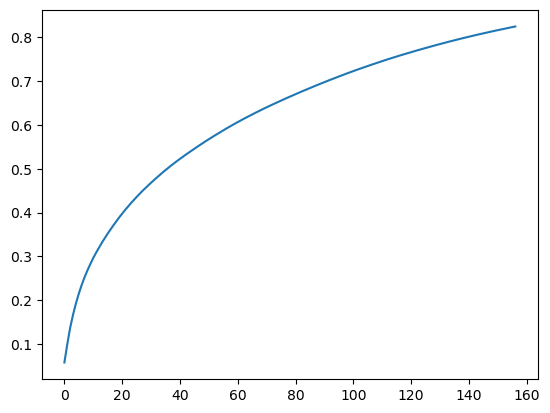

In [55]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))